<img src = "https://raw.githubusercontent.com/alvianfirdaus/Kelompok3_ML/main/Kuis%201/img/header.png"><p>

----

<table>
  <tr>
    <th>Nama Mata Kuliah </th>
    <td>Pembelajaran Mesin / Mechine Learning</td>
  </tr>
  <tr>
    <th>Topik</th>
    <td>UTS | Pertemuan 8 | Segmentasi Gambar menggunakan K means</td>
  </tr>
  <tr>
    <th>Dosen</th>
    <td>Muhammad Afif Hendawan, S.Kom., M.T. </td>
  </tr>
  <tr>
    <th>Kelompok</th>
    <td>Kelompok 3</td>
  </tr>
  <tr>
    <th>Nama Anggota Kelompok</th>
    <td><p>
    - Alvian Nur Firdaus<p>
    - Devi Andini Febrianti<p>
    - Febrian Dani Ritonga<p>
    - Naresh Pratista<p>
    - Zahra Annisa Wahono<p></td>
  </tr>
  <tr>
    <th>Hasil Pengerjaan</th>
    <td><p>
    Febrian Dani Ritonga<p>
</td>
  </tr>
</table>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

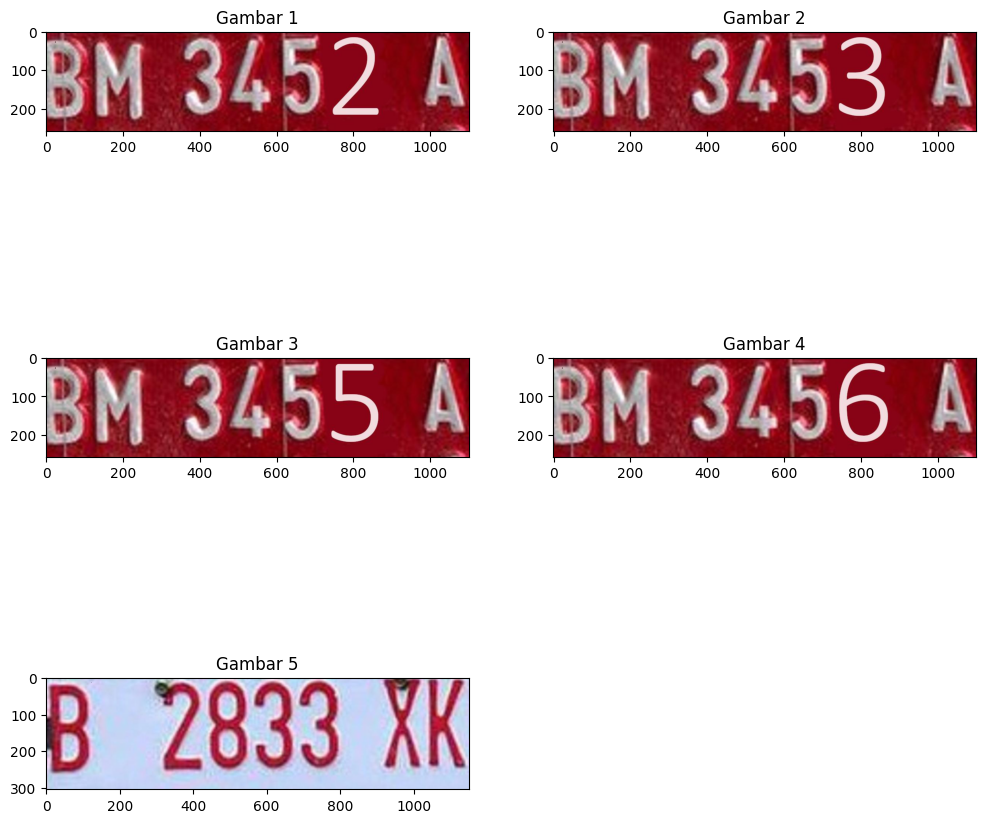

In [4]:
# Load Gambar
img_list = []

# Load and append each image to the list
img_1 = cv2.imread('/content/drive/MyDrive/UTS/ML/44.jpg')
img_list.append(img_1)

img_2 = cv2.imread('/content/drive/MyDrive/UTS/ML/45.jpg')
img_list.append(img_2)

img_3 = cv2.imread('/content/drive/MyDrive/UTS/ML/46.jpg')
img_list.append(img_3)

img_4 = cv2.imread('/content/drive/MyDrive/UTS/ML/47.jpg')
img_list.append(img_4)

img_5 = cv2.imread('/content/drive/MyDrive/UTS/ML/22.jpg')
img_list.append(img_5)

plt.figure(figsize=(12, 12))

for i, img in enumerate(img_list):
    plt.subplot(3, 2, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Gambar {i+1}")
    plt.axis('on')  # Optional, jika Anda ingin menghilangkan sumbu

plt.show()

In [5]:
h1, w1, ch1= img_1.shape
h2, w2, ch2= img_2.shape
h3, w3, ch3= img_3.shape
h4, w4, ch4= img_4.shape
h5, w5, ch5= img_5.shape

data_list = []  # Ini akan berisi data setiap gambar

def process_image(img):
    h, w, ch = img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)
    return data

# Loop untuk mengolah setiap gambar
for img in img_list:
    data = process_image(img)
    data_list.append(data)

data_1, data_2, data_3, data_4, data_5 = data_list

In [6]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

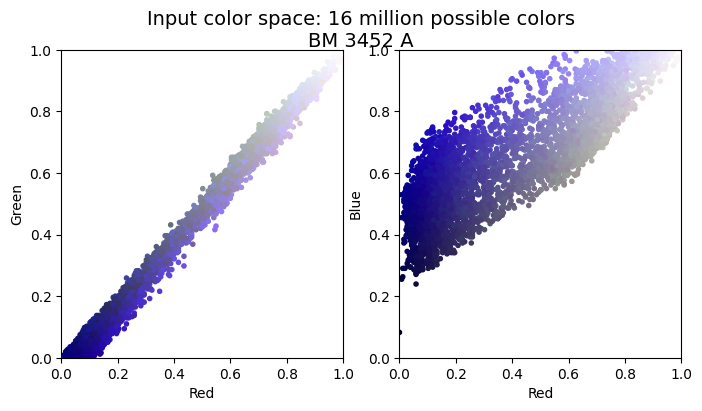

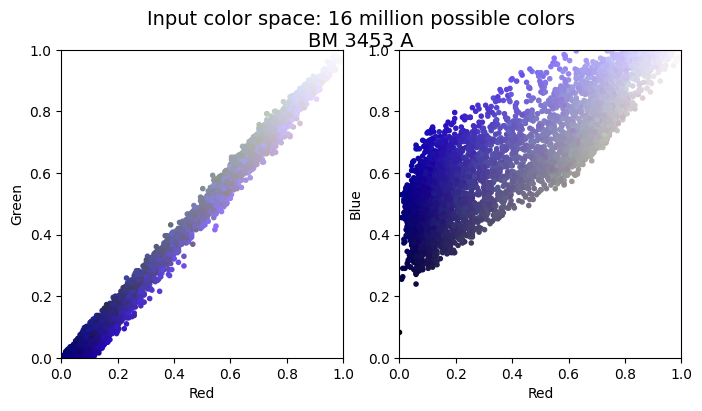

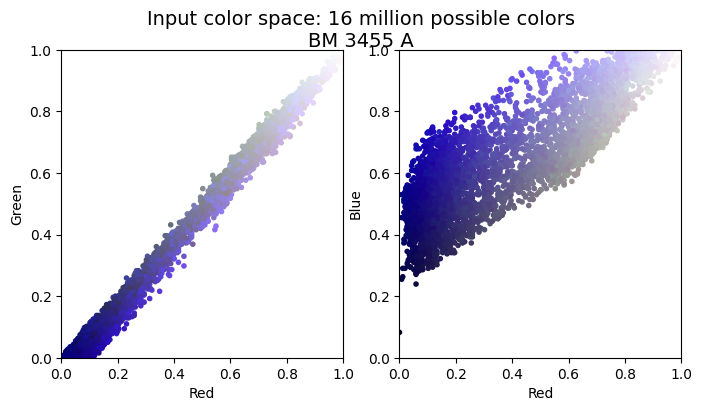

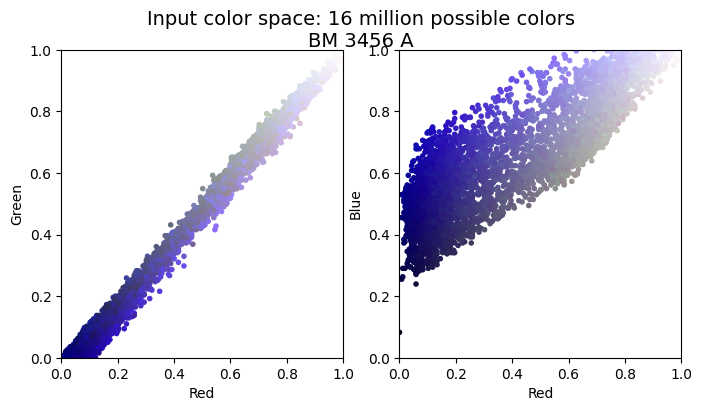

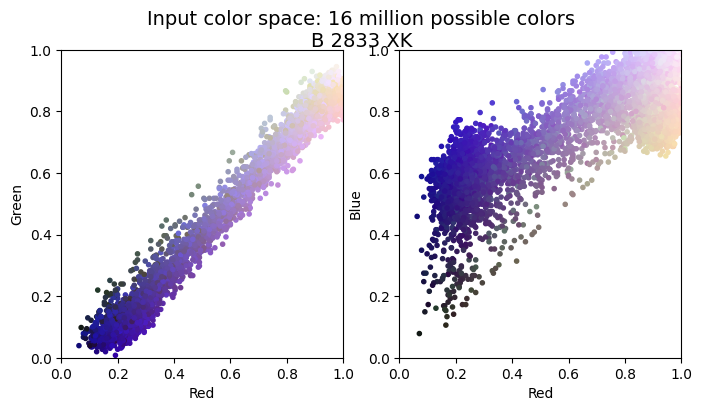

In [7]:
title = 'Input color space: 16 million possible colors'
description = 'BM 3452 A'
plot_pixels(data_1, title + '\n' + description)

title = 'Input color space: 16 million possible colors'
description = 'BM 3453 A'
plot_pixels(data_2, title + '\n' + description)

title = 'Input color space: 16 million possible colors'
description = 'BM 3455 A'
plot_pixels(data_3, title + '\n' + description)

title = 'Input color space: 16 million possible colors'
description = 'BM 3456 A'
plot_pixels(data_4, title + '\n' + description)

title = 'Input color space: 16 million possible colors'
description = 'B 2833 XK'
plot_pixels(data_5, title + '\n' + description)

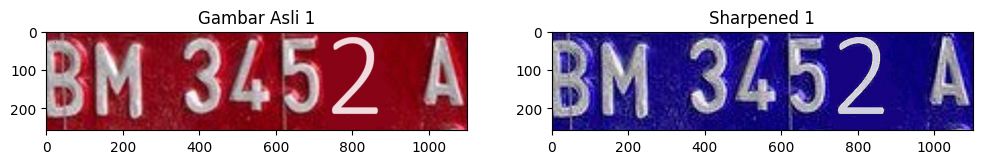

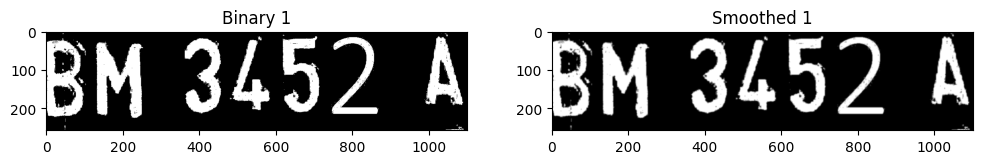

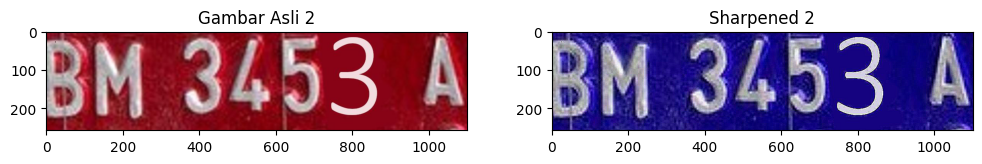

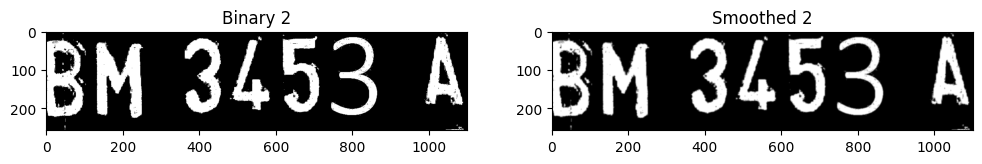

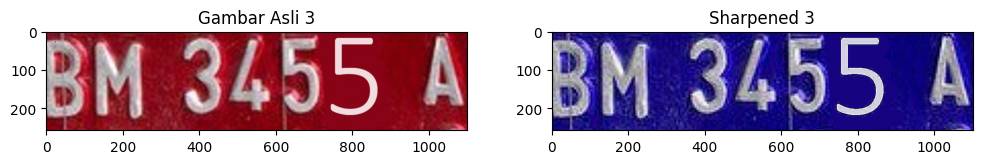

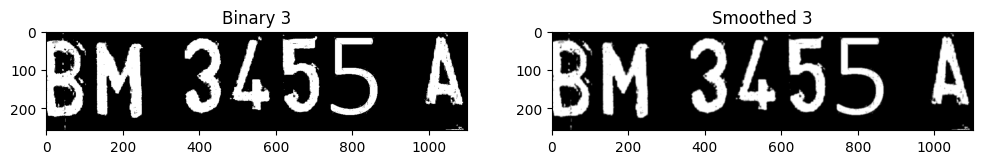

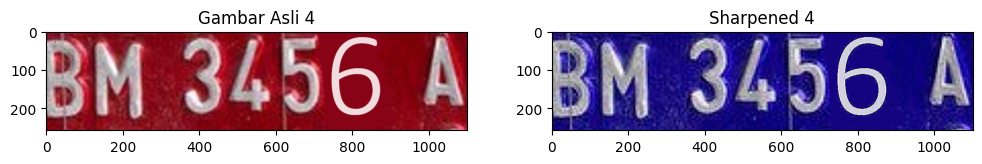

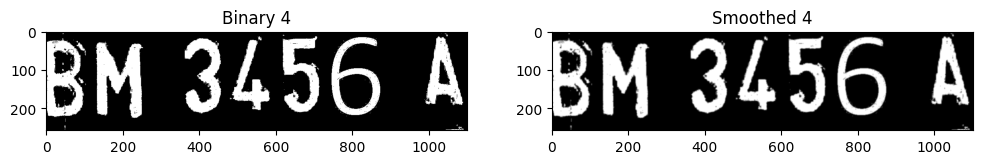

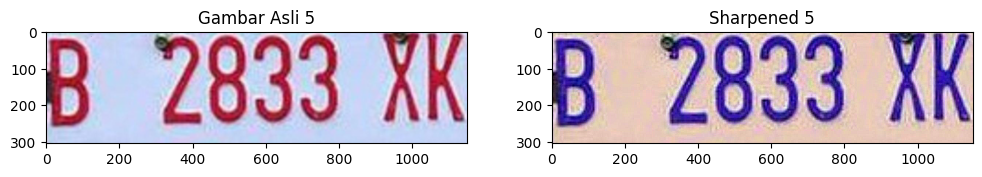

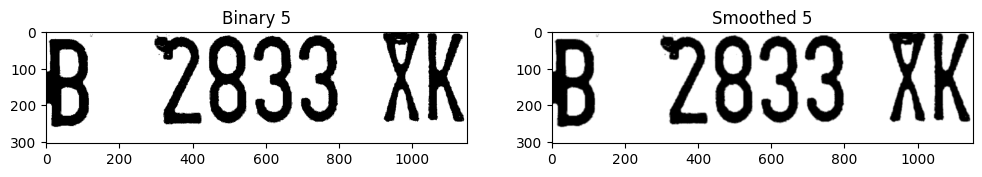

<Figure size 2500x2500 with 0 Axes>

In [14]:
from sklearn.cluster import KMeans

img_list = [img_1, img_2, img_3, img_4, img_5]

data_list = []

# Tentukan matriks 3x3 untuk sharpening_filter
sharpening_filter = np.array([[-1.046, -1.01, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]], dtype=np.float32)

# Loop untuk menampilkan perbandingan gambar
for i, img in enumerate(img_list):
    # Tampilkan gambar asli di sebelah kiri
    plt.figure(figsize=(25, 25))
    plt.subplot(5, 4, i * 4 + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Gambar Asli {i+1}")
    plt.axis('on')

    # Terapkan sharpening filter pada gambar
    sharpened_image = cv2.filter2D(img, -1, sharpening_filter)
    plt.subplot(5, 4, i * 4 + 2)
    plt.imshow(sharpened_image)
    plt.title(f"Sharpened {i+1}")
    plt.axis('on')

    # Terapkan thresholding pada gambar yang telah di-sharpen
    grey_sharpened_image = cv2.cvtColor(sharpened_image, cv2.COLOR_RGB2GRAY)
    ret, binary_image = cv2.threshold(grey_sharpened_image, 128, 255, cv2.THRESH_BINARY)
    plt.figure(figsize=(25, 25))
    plt.subplot(5, 4, i * 4 + 3)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f"Binary {i+1}")
    plt.axis('on')

    # Terapkan smoothing (misalnya, Gaussian Blur) pada gambar biner
    smoothed_image = cv2.GaussianBlur(binary_image, (5, 5), 0)
    plt.subplot(5, 4, i * 4 + 4)
    plt.imshow(smoothed_image, cmap='gray')
    plt.title(f"Smoothed {i+1}")
    plt.axis('on')

    data_list.append(smoothed_image)

plt.figure(figsize=(25, 25))
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

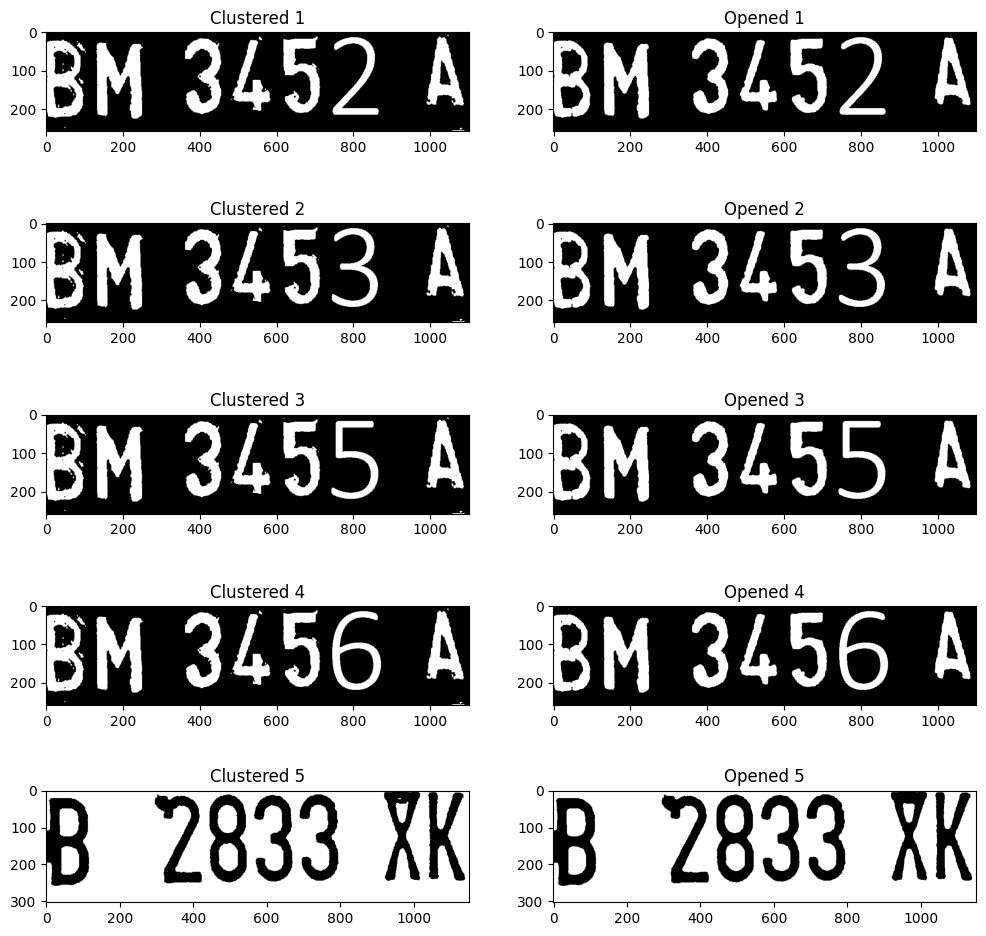

In [11]:
from scipy import ndimage
from skimage.morphology import opening, disk
import matplotlib.pyplot as plt

# ...

# Clustering citra yang telah di-smoothed dengan K-Means
data_list_cl = []
num_clusters = 2  # Jumlah cluster yang Anda inginkan
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

for smoothed_image in data_list:
    shape = np.shape(smoothed_image)
    flattened_data = smoothed_image.reshape(-1, 1)
    kmeans.fit(flattened_data)
    clustered_img = kmeans.cluster_centers_[kmeans.labels_].reshape(shape)
    data_list_cl.append(clustered_img)

# Melakukan operasi opening pada gambar hasil clustering
opened_images = []
for clustered_img in data_list_cl:
    kernel_size = 5  # Anda dapat menyesuaikan ukuran kernel sesuai kebutuhan
    kernel = disk(kernel_size)
    opened_image = opening(clustered_img, selem=kernel)
    opened_images.append(opened_image)

plt.figure(figsize=(12, 12))

# Loop untuk menampilkan gambar hasil clustering dan opened
for i, opened_img in enumerate(opened_images):
    plt.subplot(5, 2, i * 2 + 1)
    plt.imshow(data_list_cl[i], cmap='gray')
    plt.title(f"Clustered {i+1}")
    plt.axis('on')

    plt.subplot(5, 2, i * 2 + 2)
    plt.imshow(opened_img, cmap='gray')
    plt.title(f"Opened {i+1}")
    plt.axis('on')

plt.show()